# Descritiva dos dados de desnutrição divididos em macroregiões

Aluno: João Paulo de Paiva Holz    
Professor: Ivan Robert Enriquez Guzman  
Materia: Laboratorio de estatistica   
Categoria de cid: Cid 91-95

### Importando as bibliotecas que iremos utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()
plt.rcParams['figure.figsize'] = [17, 6]

## Juntando os dados

In [2]:
dfmenor1 = pd.read_csv('menor1ano.csv',';')
dfmenor1 = dfmenor1.replace('-',0)
dfmenor1['faixa'] = 'menor 1 ano'

df1a4 = pd.read_csv('1a4anos.csv',';')
df1a4['faixa'] = '1 a 4 anos'
df1a4 = df1a4.replace('-',0)

df5a9 = pd.read_csv('5a9.csv',';')
df5a9['faixa'] = '5 a 9 anos'
df5a9 = df5a9.replace('-',0)

df10a15 = pd.read_csv('10a15.csv',';')
df10a15['faixa'] = '10 a 14 anos'
df10a15 = df10a15.replace('-',0)


pop = pd.read_csv('popu.csv',';')
colnames = pop.iloc[:,0]
pop = pop.transpose().iloc[5:]
pop.columns = colnames
pop = pop.apply(pd.to_numeric)
pop = pop.reset_index()

df = pd.concat([dfmenor1,df1a4,df5a9,df10a15])
df = df.drop(df[df['Ano do Óbito']=='Total'].index) 
df = df.replace('-',0)

df['Ano do Óbito'] = pd.to_numeric(df['Ano do Óbito'])
df['3205 SUL'] = pd.to_numeric(df['3205 SUL'])
df['3207 METROPOLITANA']=pd.to_numeric(df['3207 METROPOLITANA'])
df['3209 CENTRAL NORTE']=pd.to_numeric(df['3209 CENTRAL NORTE'])
df['Total']=pd.to_numeric(df['Total'])

/tmp/ipykernel_6728/3860119622.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  dfmenor1 = pd.read_csv('menor1ano.csv',';')
/tmp/ipykernel_6728/3860119622.py:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df1a4 = pd.read_csv('1a4anos.csv',';')
/tmp/ipykernel_6728/3860119622.py:9: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df5a9 = pd.read_csv('5a9.csv',';')
/tmp/ipykernel_6728/3860119622.py:13: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df10a15 = pd.read_csv('10a15.csv',';')
/tmp/ipykernel_6728/3860119622.py:18: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument '

In [3]:
df

,Ano do Óbito,3205 SUL,3207 METROPOLITANA,3209 CENTRAL NORTE,Total,faixa
0,1996,1,1,0,2,menor 1 ano
1,1997,0,1,0,1,menor 1 ano
2,2000,0,1,0,1,menor 1 ano
3,2002,0,1,0,1,menor 1 ano
4,2004,1,1,0,2,menor 1 ano
...,...,...,...,...,...,...
19,2015,2,4,2,8,10 a 14 anos
20,2016,1,1,0,2,10 a 14 anos
21,2017,0,4,0,4,10 a 14 anos
22,2018,1,1,1,3,10 a 14 anos


## Group By
Fazendo um simples group by vemos abaixo a tabela cruzada de faixa etaria x macrorregião.

In [104]:
group.iloc[:,1:]

,3205 SUL,3207 METROPOLITANA,3209 CENTRAL NORTE,Total
faixa,,,,
1 a 4 anos,13,49,25,87
10 a 14 anos,19,61,29,109
5 a 9 anos,12,60,20,92
menor 1 ano,4,10,2,16


---
Vemos que a região metropolitava consiste da maioria da população como já se é esperado

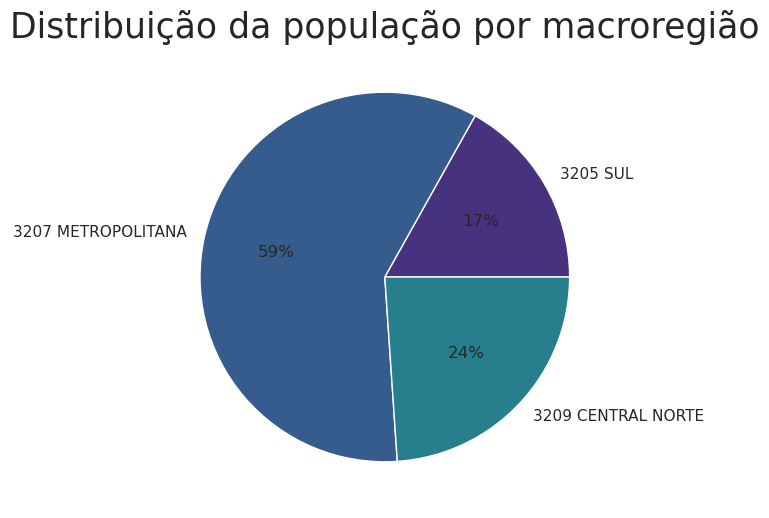

In [169]:
_ = plt.pie(pop.iloc[-1,1:4],labels=['3205 SUL', '3207 METROPOLITANA', '3209 CENTRAL NORTE'],autopct='%.0f%%')
_ = plt.title('Distribuição da população por macroregião',fontsize=25)

## Distribuição dos obitos por macroregião

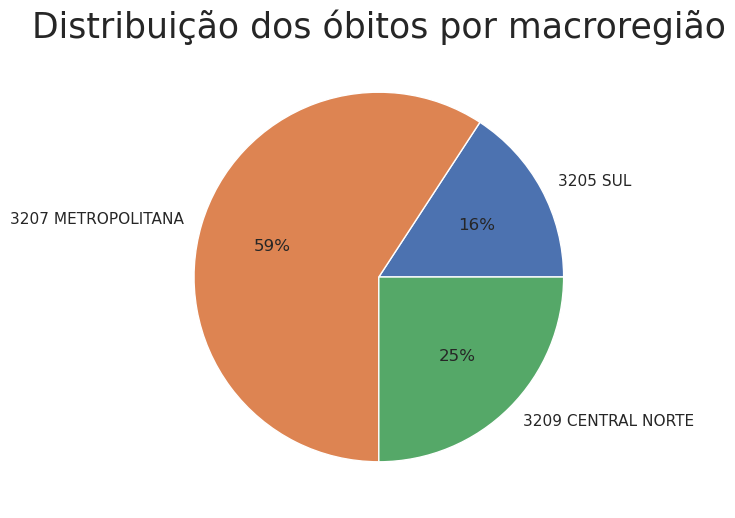

In [90]:
_ = plt.pie(df.sum()[1:4],labels=['3205 SUL', '3207 METROPOLITANA', '3209 CENTRAL NORTE'],autopct='%.0f%%')
_ = plt.title('Distribuição dos óbitos por macroregião',fontsize=25)

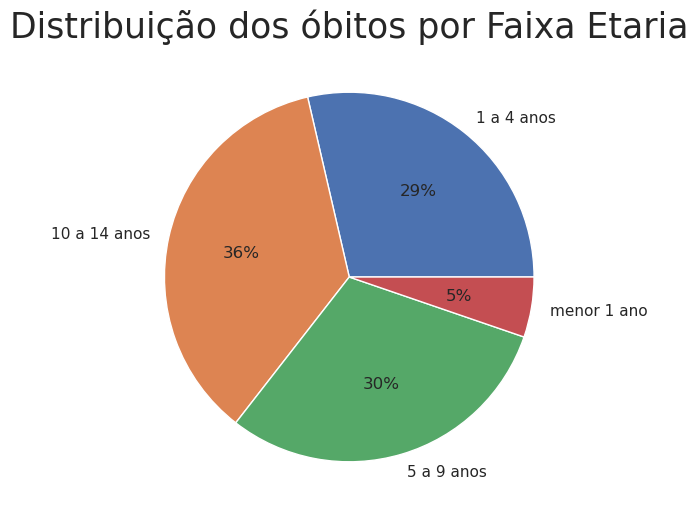

In [91]:
group = df.groupby(['faixa']).sum()
_ = plt.pie(group['Total'],labels=group.index,autopct='%.0f%%')
_ = plt.title('Distribuição dos óbitos por Faixa Etaria',fontsize=25)

Vemos que a maioria dos óbitos se encontra entre 10 e 14 anos. E vemos que menos de 1 ano é a menor proporção com apenas 5%. 
  
O que é um bom indício

---

# Series Historicas

Nas series historicas vemos a população do espirito santo chegando a quase 4 milhões de pessoas.
As series historicas dos Cids parecem estar estacionarias, onde nas idades mais baixas existem menos óbitos e nas idades mais altas vemos mais mortes.

In [93]:
def plot_lines(df,
               xcol = 'index',
               title = "População do espirito santo",
               xlab = "Ano",
               ylab = "População"):
    palette = plt.get_cmap('Set1')
    num=0
    for column in df.columns[df.columns!=xcol]:
        num+=1
        plt.plot(df[xcol], df[column], marker='o', color=palette(num), linewidth=1, alpha=0.9, label=column)
    plt.legend(loc=2, ncol=2)
    plt.title(title, loc='left', fontsize=25, fontweight=0, color='Black')
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.yscale('linear')
    plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
    plt.show()

## Serie historica do crescimento populacional do Espirito Santo

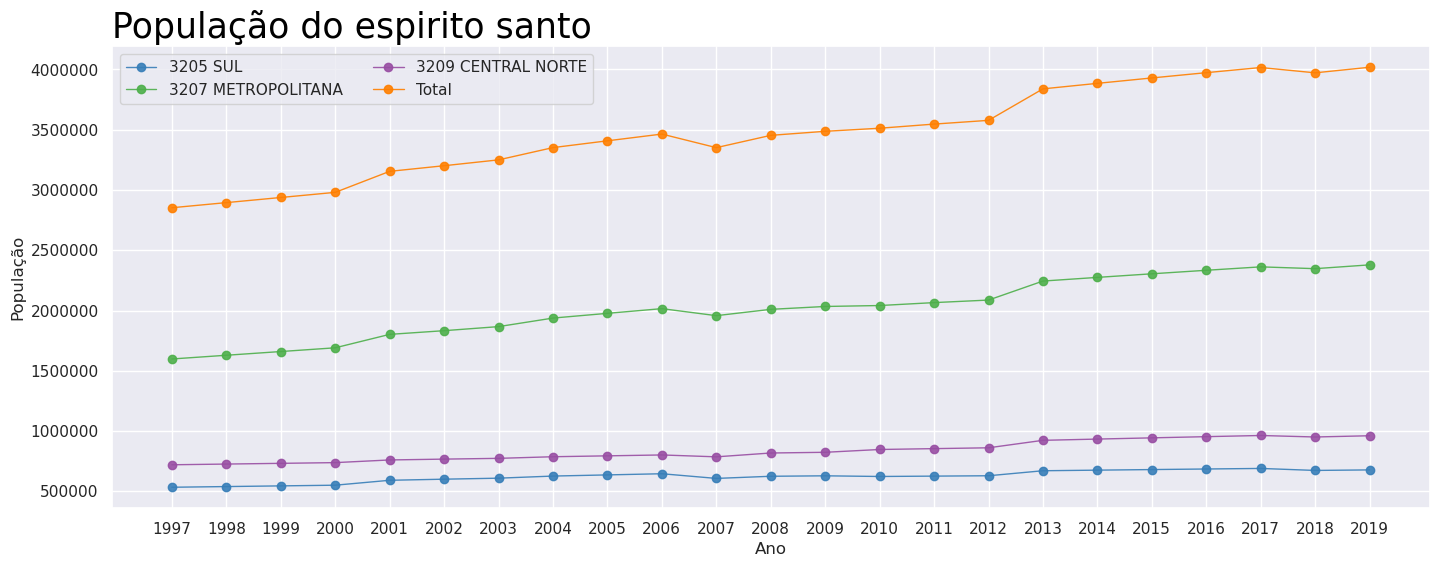

In [94]:
plot_lines(pop,xcol='index')

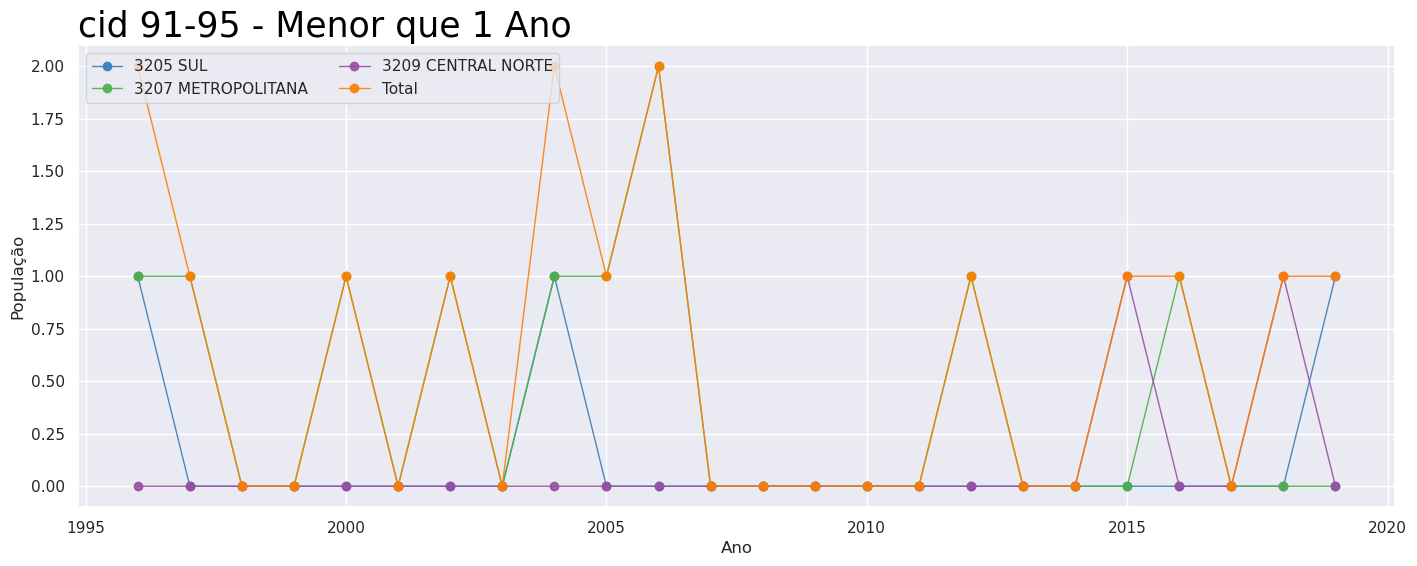

In [95]:
df_plot = dfmenor1.drop('faixa',axis=1)
df_plot.index = df_plot['Ano do Óbito']
df_plot = df_plot.drop('Ano do Óbito',axis=1)
df_plot = df_plot.iloc[:-1,:]
df_plot = df_plot.apply(pd.to_numeric)
df_plot = df_plot.reset_index()
df_plot = df_plot.apply(pd.to_numeric)
df_plot2 = pd.DataFrame(np.arange(1996,2020))
df_plot2.columns = ['ano']
df_plot2 = df_plot2.apply(pd.to_numeric)
teste = df_plot.merge(df_plot2,how='right',right_on='ano',left_on='Ano do Óbito')
teste = teste.replace(np.NaN,0)
plot_lines(teste.iloc[:,1:],xcol = 'ano',title= 'cid 91-95 - Menor que 1 Ano')

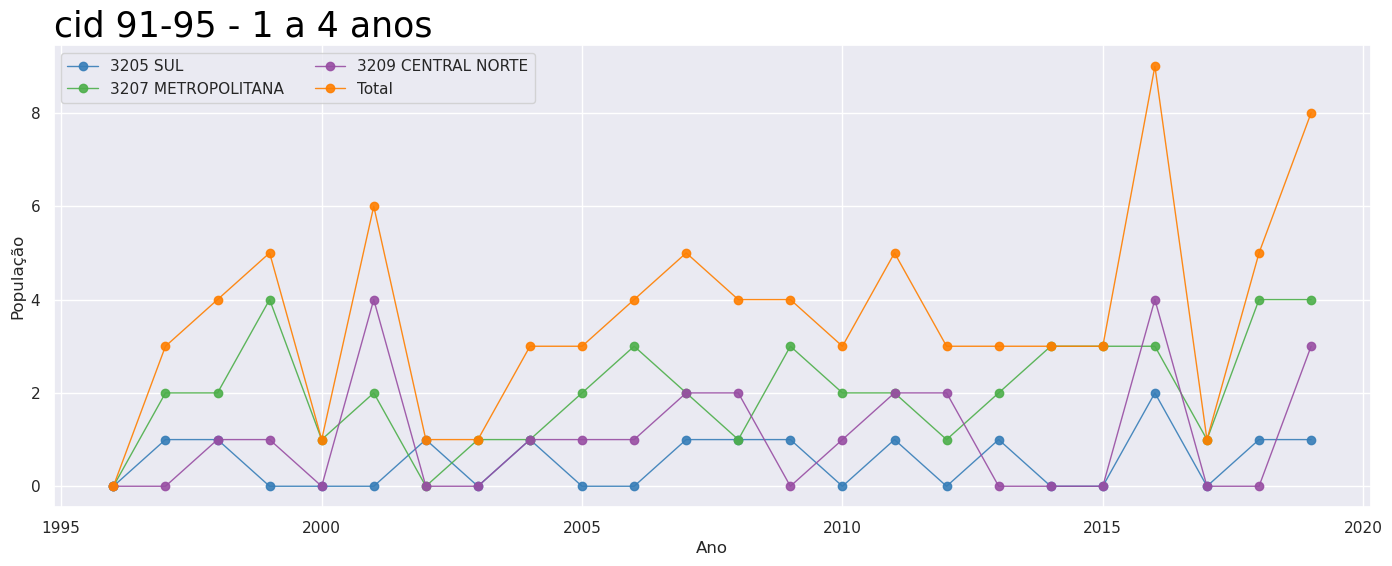

In [96]:
df_plot = df1a4.drop('faixa',axis=1)
df_plot.index = df_plot['Ano do Óbito']
df_plot = df_plot.drop('Ano do Óbito',axis=1)
df_plot = df_plot.iloc[:-1,:]
df_plot = df_plot.apply(pd.to_numeric)
df_plot = df_plot.reset_index()
df_plot = df_plot.apply(pd.to_numeric)
df_plot2 = pd.DataFrame(np.arange(1996,2020))
df_plot2.columns = ['ano']
df_plot2 = df_plot2.apply(pd.to_numeric)
teste = df_plot.merge(df_plot2,how='right',right_on='ano',left_on='Ano do Óbito')
teste = teste.replace(np.NaN,0)
plot_lines(teste.iloc[:,1:],xcol = 'ano',title= 'cid 91-95 - 1 a 4 anos')

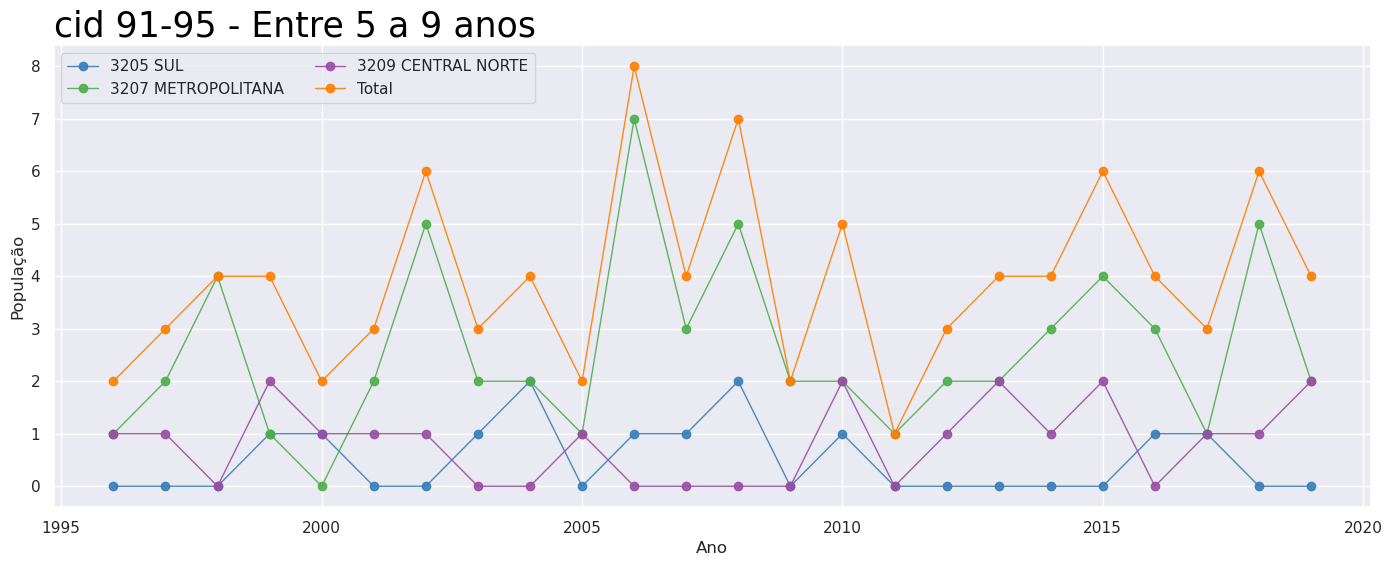

In [97]:
df_plot = df5a9.drop('faixa',axis=1)
df_plot.index = df_plot['Ano do Óbito']
df_plot = df_plot.drop('Ano do Óbito',axis=1)
df_plot = df_plot.iloc[:-1,:]
df_plot = df_plot.apply(pd.to_numeric)
df_plot = df_plot.reset_index()
df_plot = df_plot.apply(pd.to_numeric)
df_plot2 = pd.DataFrame(np.arange(1996,2020))
df_plot2.columns = ['ano']
df_plot2 = df_plot2.apply(pd.to_numeric)
teste = df_plot.merge(df_plot2,how='right',right_on='ano',left_on='Ano do Óbito')
teste = teste.replace(np.NaN,0)
plot_lines(teste.iloc[:,1:],xcol = 'ano',title= 'cid 91-95 - Entre 5 a 9 anos')

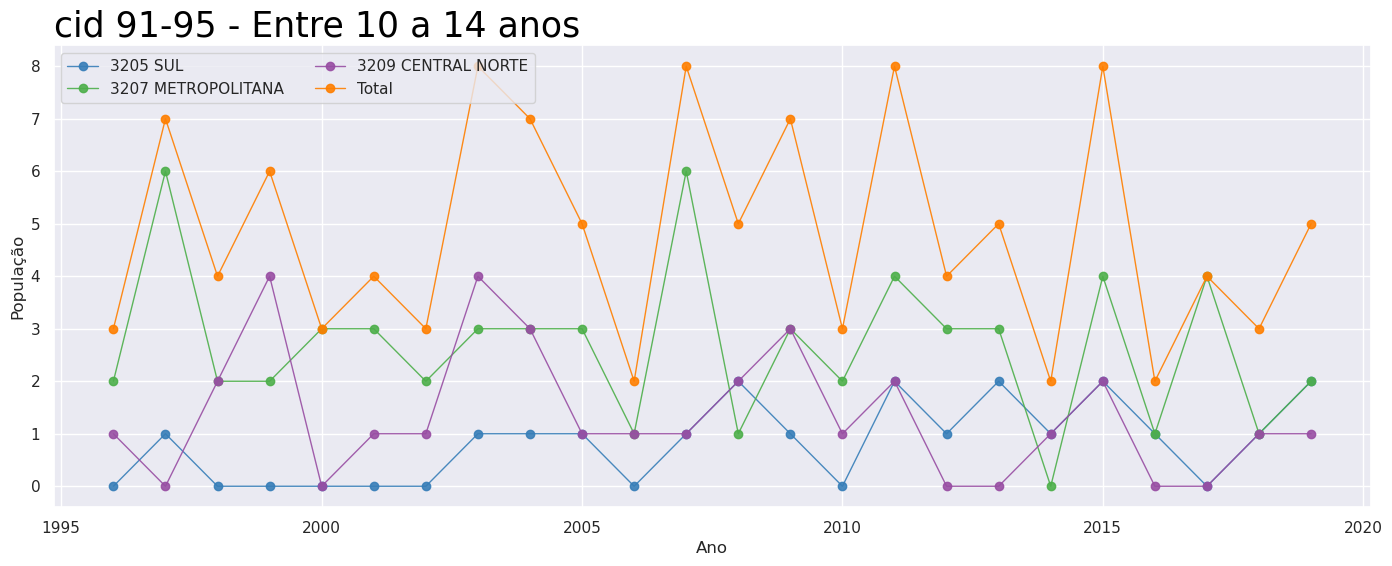

In [98]:
df_plot = df10a15.drop('faixa',axis=1)
df_plot.index = df_plot['Ano do Óbito']
df_plot = df_plot.drop('Ano do Óbito',axis=1)
df_plot = df_plot.iloc[:-1,:]
df_plot = df_plot.apply(pd.to_numeric)
df_plot = df_plot.reset_index()
df_plot = df_plot.apply(pd.to_numeric)
df_plot2 = pd.DataFrame(np.arange(1996,2020))
df_plot2.columns = ['ano']
df_plot2 = df_plot2.apply(pd.to_numeric)
teste = df_plot.merge(df_plot2,how='right',right_on='ano',left_on='Ano do Óbito')
teste = teste.replace(np.NaN,0)
plot_lines(teste.iloc[:,1:],xcol = 'ano',title= 'cid 91-95 - Entre 10 a 14 anos')

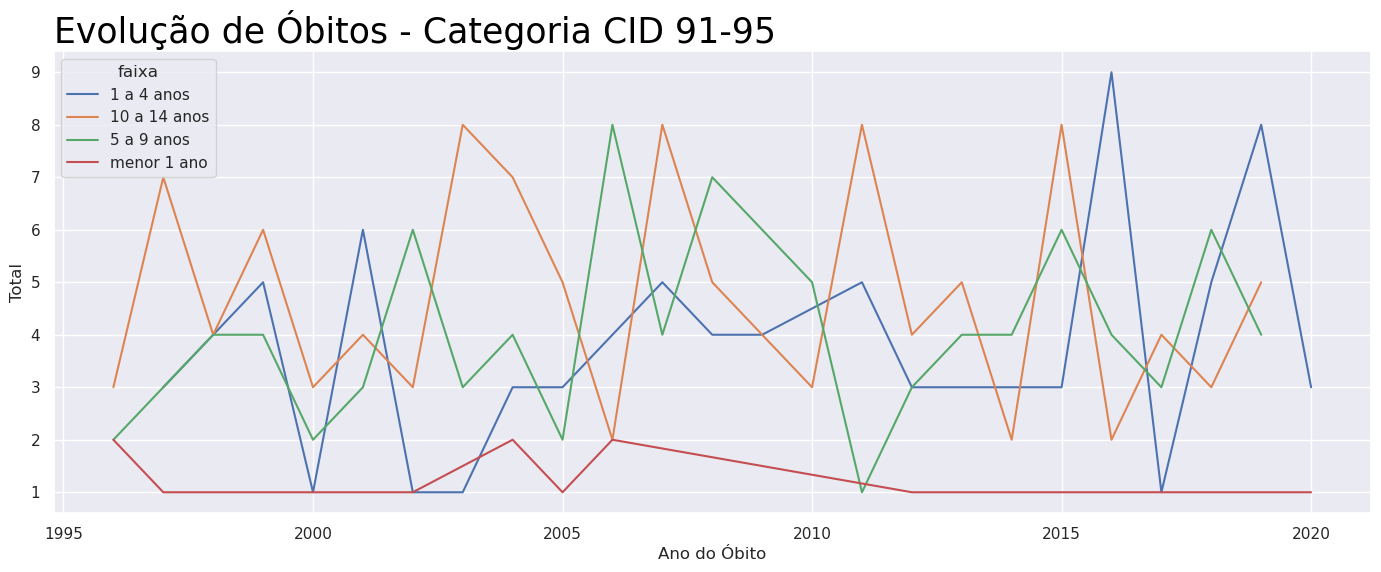

In [99]:
newdf = pd.DataFrame(df.groupby(['faixa','Ano do Óbito']).sum()['Total']).reset_index()
_ = sns.lineplot(x = newdf['Ano do Óbito'],y=newdf['Total'],hue = newdf['faixa'])
_ = plt.title('Evolução de Óbitos - Categoria CID 91-95 ', loc='left', fontsize=25, fontweight=0, color='Black')

# Plot Espirito Santo

In [5]:
import geopandas as gpd

In [11]:
x = gpd.read_file('Lim_Macrorregiao.shp')
x = x[x.nome!='Norte']

In [12]:
x

,nome,areaKm2,fonte,data,origem,geometry
0,Central,12241.138658,CGEO/IJSN,Dezembro de 2011,Lei 9.768 de 28/12/2011,"POLYGON ((284754.572 7843508.373, 284756.138 7..."
1,Sul,10344.980138,CGEO/IJSN,Dezembro de 2011,Lei 9.768 de 28/12/2011,"POLYGON ((253980.461 7764750.189, 253984.403 7..."
3,Metropolitana,9105.799425,CGEO/IJSN,Dezembro de 2011,Lei 9.768 de 28/12/2011,"POLYGON ((336469.406 7703048.167, 334095.567 7..."


In [151]:
pop.iloc[-1,:]

Macrorregião de Saúde
index                    2019
3205 SUL               678071
3207 METROPOLITANA    2379133
3209 CENTRAL NORTE     961446
Total                 4018650
Name: 22, dtype: object

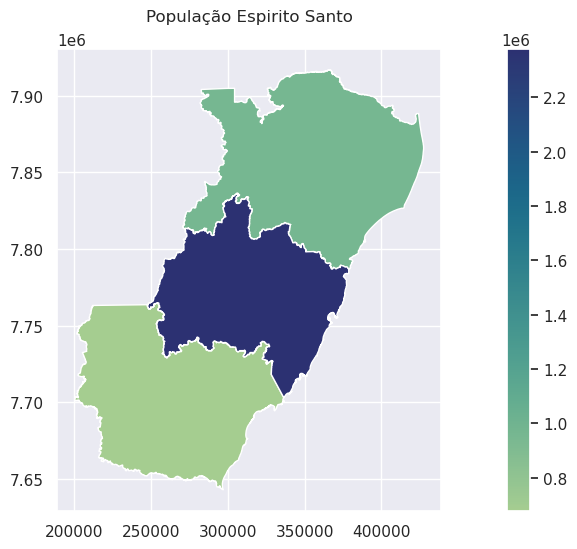

In [146]:
x['value'] = [961446,678071,2379133]
_ = x.plot(x['value'],cmap="crest",legend=True)
_ = plt.title('População Espirito Santo',pad=20)

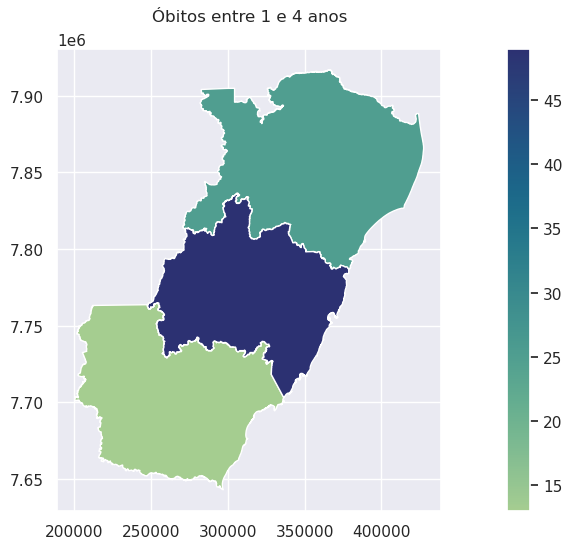

In [154]:
x['value'] = [25,13,49]
_ = x.plot(x['value'],cmap="crest",legend=True)
_ = plt.title('Óbitos entre 1 e 4 anos',pad=20)

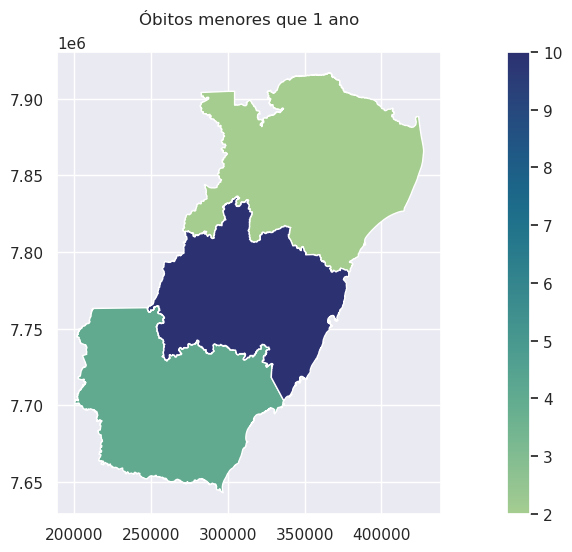

In [156]:
x['value'] = [2,4,10]
_ = x.plot(x['value'],cmap="crest",legend=True)
_ = plt.title('Óbitos menores que 1 ano',pad=20)

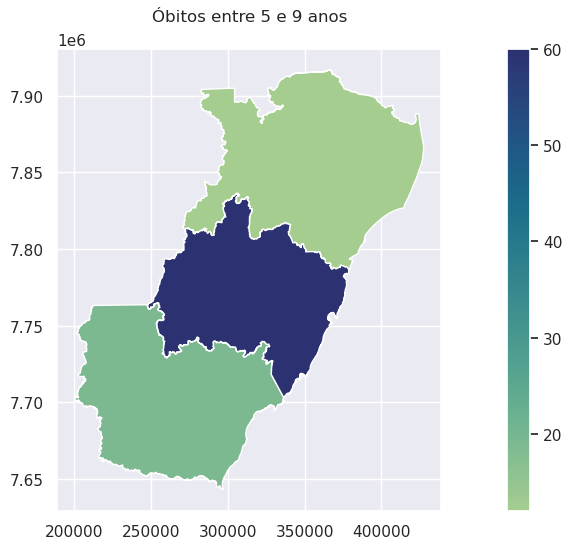

In [158]:
x['value'] = [12,19,60]
_ = x.plot(x['value'],cmap="crest",legend=True)
_ = plt.title('Óbitos entre 5 e 9 anos',pad=20)

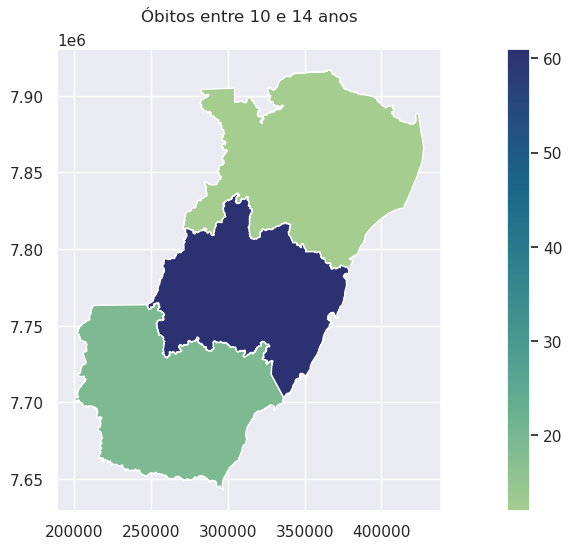

In [163]:
x['value'] = [12,19,61]
_ = x.plot(x['value'],cmap="crest",legend=True)
_ = plt.title('Óbitos entre 10 e 14 anos',pad=20)

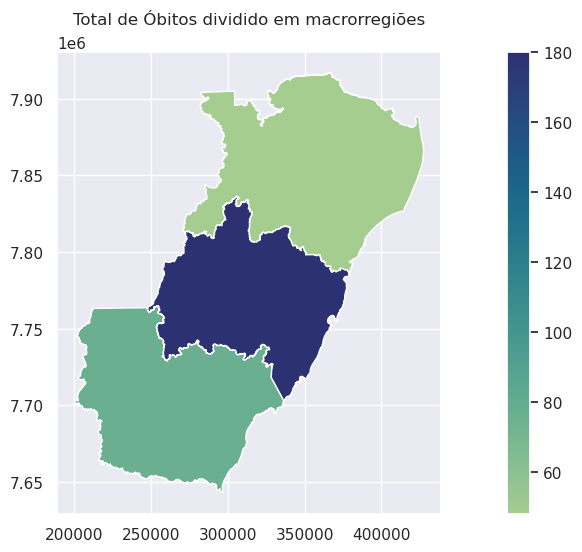

In [164]:
x['value'] = [48,76,180]
_ = x.plot(x['value'],cmap="crest",legend=True)
_ = plt.title('Total de Óbitos dividido em macrorregiões',pad=20)